# Аналитика в авиакомпании

# Содержание

1. Изучение данных из файлов
2. Анализ данных
3. Общий вывод

## Описание проекта:
В нашем распоряжении файлы, в которых содержатся результаты запросов из базы данных по авиакомпаниям за 2018 год.
- query_1.csv содержит информацию о моделях самолетов, количестве рейсов каждой модели за сентябрь 2018 г.;
- query_3.csv содержит информацию о городах и среднем количестве рейсов, прибывающих в эти города в августе 2018 г.

## Цели:
- Изучить данные, проверить их на корректность;
- Выбрать топ-10 городов по количеству рейсов;
- Построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- Сделать выводы по каждому из графиков и пояснить результаты.

# 1. Изучение данных из файлов <a class="anchor" id="first-bullet"></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Импортируем данные:

In [2]:
try:
    df_query_1 = pd.read_csv('query_1.csv')
except:
    df_query_1 = pd.read_csv('/datasets/query_1.csv')

df_query_1.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [3]:
try:
    df_query_3 = pd.read_csv('query_3.csv')
except:
    df_query_3 = pd.read_csv('/datasets/query_3.csv')

df_query_3.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


Изучим данные на корректность по первой таблице:

In [4]:
df_query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [5]:
print(df_query_1['model'].unique())

['Airbus A319-100' 'Airbus A321-200' 'Boeing 737-300' 'Boeing 767-300'
 'Boeing 777-300' 'Bombardier CRJ-200' 'Cessna 208 Caravan'
 'Sukhoi SuperJet-100']


Как видим, неявных дубликатов моделей (из-за некорректного названия) нет. Имеется 8 моделей и 8 строк в датафрейме. Пропущенных данных или несоответствия формату нет.

Изучим данные на корректность по второй таблице:

In [6]:
df_query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
print(len(df_query_3['city'].unique()))

101


Пока несоответствий не найдено. Проверим названия городов визуально, так как список небольшой:

In [8]:
print(df_query_3['city'].unique())

['Абакан' 'Анадырь' 'Анапа' 'Архангельск' 'Астрахань' 'Барнаул' 'Белгород'
 'Белоярский' 'Благовещенск' 'Братск' 'Брянск' 'Бугульма' 'Владивосток'
 'Владикавказ' 'Волгоград' 'Воркута' 'Воронеж' 'Геленджик' 'Горно-Алтайск'
 'Грозный' 'Екатеринбург' 'Иваново' 'Ижевск' 'Иркутск' 'Йошкар-Ола'
 'Казань' 'Калининград' 'Калуга' 'Кемерово' 'Киров' 'Когалым'
 'Комсомольск-на-Амуре' 'Краснодар' 'Красноярск' 'Курган' 'Курск' 'Кызыл'
 'Липецк' 'Магадан' 'Магнитогорск' 'Махачкала' 'Минеральные Воды' 'Мирный'
 'Москва' 'Мурманск' 'Надым' 'Нальчик' 'Нарьян-Мар' 'Нерюнгри'
 'Нефтеюганск' 'Нижневартовск' 'Нижнекамск' 'Нижний Новгород'
 'Новокузнецк' 'Новосибирск' 'Новый Уренгой' 'Норильск' 'Ноябрьск'
 'Нягань' 'Омск' 'Оренбург' 'Орск' 'Пенза' 'Пермь' 'Петрозаводск'
 'Петропавловск-Камчатский' 'Псков' 'Ростов-на-Дону' 'Салехард' 'Самара'
 'Санкт-Петербург' 'Саранск' 'Саратов' 'Советский' 'Сочи' 'Ставрополь'
 'Стрежевой' 'Сургут' 'Сыктывкар' 'Тамбов' 'Томск' 'Тюмень' 'Удачный'
 'Улан-Удэ' 'Ульяновск' 'Ур

Все названия городов уникальны, ошибок или непоследовательности в названиях не содержится. На этом предварительное изучение завершено.

Проверим таблицы на дубликаты среди рядов:

In [9]:
duplicates = df_query_1[df_query_1.duplicated(keep='last')]
print(duplicates)

Empty DataFrame
Columns: [model, flights_amount]
Index: []


In [10]:
duplicates = df_query_3[df_query_3.duplicated(keep='last')]
print(duplicates)

Empty DataFrame
Columns: [city, average_flights]
Index: []


Дублирующихся строк не обнаружено.

**Общие выводы по разделу:** <a class="anchor" id="first-zero-bullet"></a>

- ошибок или непоследовательности в типах данных не содержится;
- все категории уникальны, пропуски отсутствуют.

# 2. Анализ данных <a class="anchor" id="second-bullet"></a>

**Анализ топ-10 городов по количеству рейсов:**

Сгруппируем данные по названию города и отсортируем в порядке убывания:

In [11]:
top10_city_num_flights = df_query_3.groupby('city')['average_flights'].mean().sort_values(ascending=False).head(10)
print(top10_city_num_flights)

city
Москва             129.774194
Санкт-Петербург     31.161290
Новосибирск         17.322581
Красноярск          11.580645
Екатеринбург        11.322581
Ростов-на-Дону      10.193548
Пермь               10.129032
Брянск              10.000000
Сочи                 9.612903
Ульяновск            9.580645
Name: average_flights, dtype: float64


**Построение графиков:**

**- модели самолетов и количество рейсов**

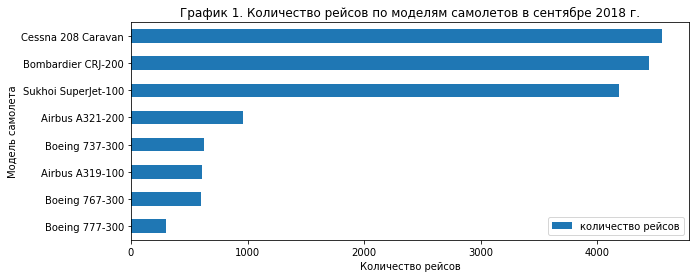

In [12]:
df_query_1.sort_values(by=['flights_amount']).plot(x='model', y='flights_amount', kind='barh', 
                            figsize=(10, 4), label='количество рейсов')

plt.title('График 1. Количество рейсов по моделям самолетов в сентябре 2018 г.')
plt.xlabel('Количество рейсов')
plt.ylabel('Модель самолета')

plt.show()

На рынке представлено только 8 моделей, и тройка лидеров выглядит так: Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi Superjet.

Самолеты Airbus и Boeing занимают скромные позиции. Почему? Для точной информации необходимо знать стоимость билетов, наличие квот на рейсы, направления рейсов, ситуацию на рынке. Однако, предварительно можно указать следующее:
- Cessna 208 Caravan это легкий одномоторный самолет. Применяется в малой и грузовой авиации. Соответственно, запускать такие рейсы дешевле, и рейсов потребуется больше;
- Bombardier CRJ-200 - небольшой самолет для региональных перевозок. Перевозит малое количество пассажиров (50), летает чаще, чем дальние рейсы;
- Sukhoi Superjet-100 - самолет для региональных полетов. Самолеты этой марки имеют неоднозначную репутацию, но на 2017-2018 приходился пик производства этих самолетов, происходили интенсивные закупки в рамках госпрограммы, отсюда такое высокие налеты;
- Остальные самолеты принимают на борт гораздо большее количество пассажиров, предназначены для полетов на дальние дистанции, отсюда и меньшее количество рейсов.

**- города и количество рейсов**

Вывод будет сделан ниже по двум графикам: сводному и top-10.

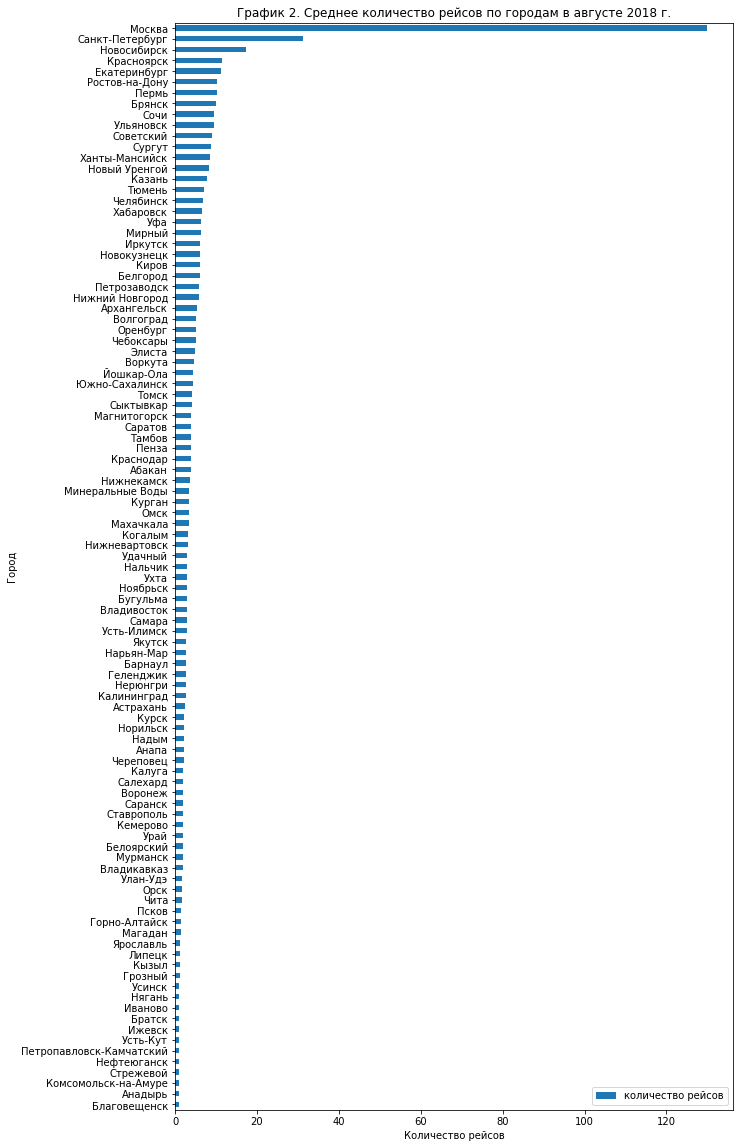

In [13]:
df_query_3.sort_values(by=['average_flights']).plot(x='city', y='average_flights', kind='barh', 
                            figsize=(10, 20), label='количество рейсов')

plt.title('График 2. Среднее количество рейсов по городам в августе 2018 г.')
plt.xlabel('Количество рейсов')
plt.ylabel('Город')
plt.legend(loc = "lower right")

plt.show()

**- топ-10 городов и количество рейсов**

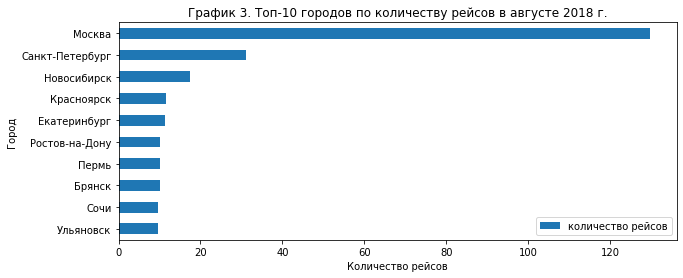

In [14]:
top10_city_num_flights.sort_values().plot(x='city', 
                            y='average_flights', kind='barh', 
                            figsize=(10, 4), label='количество рейсов')

plt.title('График 3. Топ-10 городов по количеству рейсов в августе 2018 г.')
plt.xlabel('Количество рейсов')
plt.ylabel('Город')
plt.legend(loc = "lower right")

plt.show()

- Как видим, в тройке лидеров Москва, Санкт-Петербург, Новосибирск;
- Ожидаемо, Москва опережает все остальные города по количеству рейсов;
- Города в топ-10 за пределами тройки лидеров имеют примерно одинаковое количество рейсов;
- Распределение количества рейсов по остальным городам убывает очень постепенно, заметны подкатегории (региональные центры / областные центры и далее), в которых примерно одинаковое количество рейсов;
- Попадание в Топ-10 небольших городов может быть вызвано различными причинами. Допустим, Сочи является курортным городом, соответственно, принимает большое количество туристов в летние месяцы. В Брянске в в этот период проходит подготовка к празднованию дня города и культурно-патриотическим мероприятиям. В Перми в это время проходили бизнес-конференции. Кроме того, во все эти города люди возвращаются из отпусков в конце лета. Ну и кроме того, некоторые города являются пунктами пересадки.

**Общие выводы по разделу:** <a class="anchor" id="second-zero-bullet"></a>

- нами построены графики по указанным категориям и описаны выводы;
- имеется явная тройка лидеров среди городов по количеству рейсов (Москва, Санкт-Петербург, Новосибирск);
- по графику соотношения моделей и количества рейсов заметно, что меньшие по размеру самолеты ожидаемо совершают большее количество рейсов.

# 3. Общий вывод <a class="anchor" id="third-bullet"></a>

Нами изучены выгрузки из базы данных авиакомпаний, содержащие информацию о моделях самолетов и количестве выполняемых ими рейсов, а также информацию о городах и количестве принимаемых ими рейсов.

Мы можем сделать следующие выводы:

- Среди городов по количеству рейсов имеется тройка лидеров (Москва, Санкт-Петербург, Новосибирск);
- Очевидно, что большее количество рейсов совершается в крупные центры деловой активности и промышленности либо хабы;
- Самолеты меньшей вместимости совершают большее количество рейсов, самолеты большей вместимости совершают меньше рейсов в абсолютном сравнение (но это не значит, что они перевозят меньше пассажиров!);
- Следует отметить, что данные взяты за сентябрь и август 2018 года. Эти месяцы непримечательны по мероприятиям (последние игры чемпионата по футболу-2018 завершились еще в июле), так что ситуация в другое время может измениться. Также, как отмечено выше, популярность самолетов Sukhoi Superjet впоследствии сильна упала (https://ru.wikipedia.org/wiki/Sukhoi_Superjet_100)